In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'


import joblib, os

## Load Your Saved Joblib File

In [3]:
## Load the joblib file stored in the models folder
fname = "Models/best-models"

loaded = joblib.load(fname)
# Preview the contents of the loaded joblib objects
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [8]:
## Saving the loaded objects as separate varaibles
X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']

preprocessor = loaded['preprocessor']
lin_reg_final = loaded['LinearRegression']
dc_reg = loaded['DecisionTreeRegressor']

X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.319041,1.363802,-0.043295,-1.268171,0.026015,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.574485,-0.733244,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-0.158360,-0.733244,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,-1.619217,-0.733244,0.511794,-0.192206,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,1.266006,1.363802,-0.002094,1.735461,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Explain your tree-based model with shap:

In [9]:
# Import and init shap
import shap
shap.initjs()

In [10]:
# Take a sample of the training data (nsampel=500, use random_state=SEED)
X_shap = shap.sample(X_train,nsamples = 500,random_state=SEED)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4469,-1.201325,1.363802,0.159140,-1.023504,-1.286175,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4438,-1.815803,-0.733244,-0.606211,0.388559,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
366,-1.123632,1.363802,0.230603,1.884956,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2219,-0.956475,-0.733244,-0.312724,-0.184640,0.145305,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6080,-1.467363,-0.733244,2.122053,-0.920256,0.026015,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [11]:
# Instantiate a Model Explainer with the model
dc_explainer = shap.Explainer(dc_reg)

## Get shap values from the explainer
dc_shap_values = dc_explainer(X_shap)
dc_shap_values[0]

.values =
array([ 4.72421559e+01,  1.97011550e+02, -5.88685266e+01, -9.31490155e+02,
       -3.76623155e+01,  2.74979198e-01, -1.50510831e+00, -3.43039257e-01,
       -1.03610053e+01, -2.32299819e+00, -9.13133535e-02, -3.56338716e+00,
       -2.79909339e+00,  2.92711012e-01,  3.06407032e+01,  1.44297677e-02,
       -2.28900908e-01, -9.00992468e-01,  1.03501272e+01, -1.11034794e+00,
       -2.06693331e+00,  5.47615139e+00, -6.91422240e+01, -3.71133292e+01,
       -1.60251963e+01, -1.03554625e+01, -1.64833683e+00, -1.90839709e+01,
        2.09747263e+02,  1.31219760e+01,  2.35414695e+00, -6.13117694e+01])

.base_values =
array([2153.64301101])

.data =
array([-1.20132496,  1.36380177,  0.15914019, -1.02350384, -1.28617545,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.    

In [14]:
## Create an explainer for the lin_reg
linreg_explainer= shap.Explainer(lin_reg_final, X_shap)

## get shap values for linreg
shap_values_linreg = linreg_explainer(X_shap)
shap_values_linreg.shape

(500, 32)

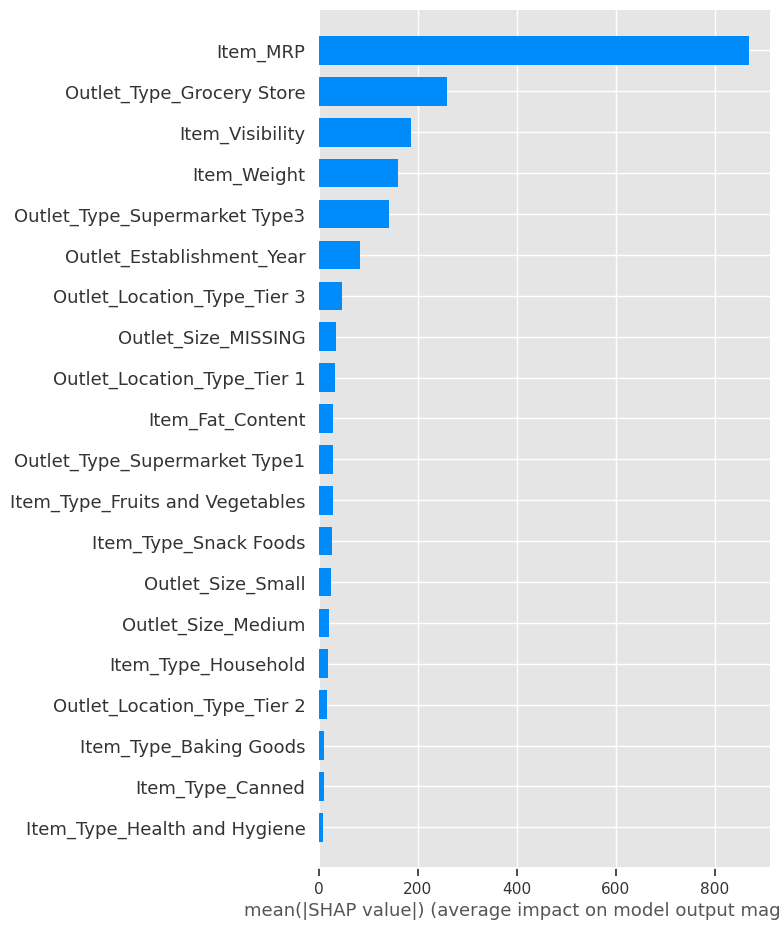

In [17]:
## create a summary plot (bar version)
shap.summary_plot(dc_shap_values, features = X_shap, plot_type='bar')

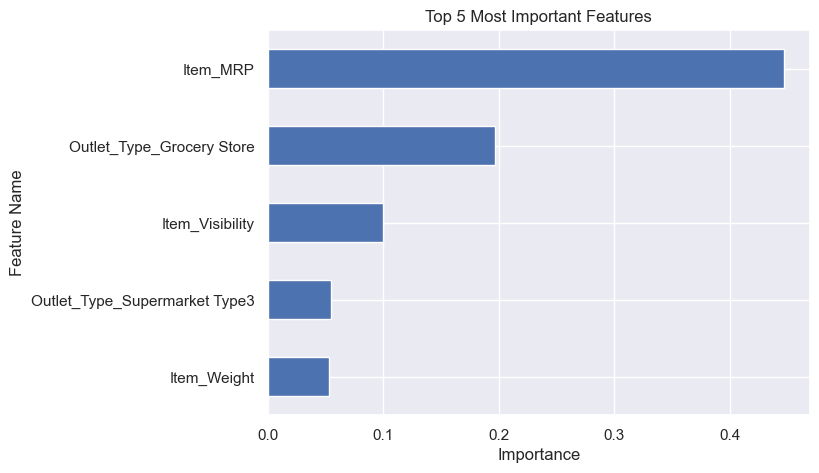

### They are very much the same or close to the same. All the top important features are present in both bar plot.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


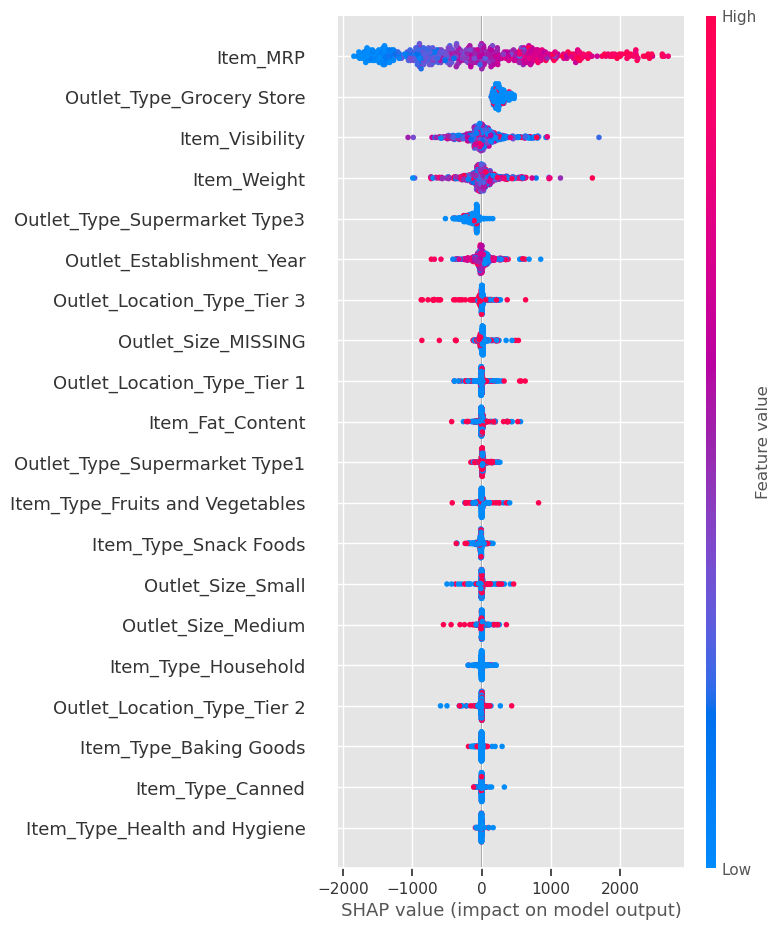

In [18]:
## create a summary plot (dot/default version)
shap.summary_plot(dc_shap_values, features = X_shap)

### It like the most important features are Item_MRP, Item_Visibility, and Item_Weight. They have major impacts on the sales of every store. This makes total sense to me.